## a. installing yfinance

In [1]:
# Install the yfinance library using a package manager like pip
!pip install yfinance

## b. Downloading Bitcoin price data

In [2]:
import yfinance as yf
import pandas as pd

start_train = "2019-01-01"
end_train = "2024-01-01"
start_test = "2024-01-01"

btc_train = yf.download("BTC-USD", start=start_train, end=end_train)
btc_test = yf.download("BTC-USD", start=start_test)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
btc_train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055


In [4]:
btc_test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347
...,...,...,...,...,...,...
2024-04-30,63839.417969,64703.332031,59120.066406,60636.855469,60636.855469,37840840057
2024-05-01,60609.496094,60780.500000,56555.292969,58254.011719,58254.011719,48439780271
2024-05-02,58253.703125,59602.296875,56937.203125,59123.433594,59123.433594,32711813559


## c. Plotting the training and test data

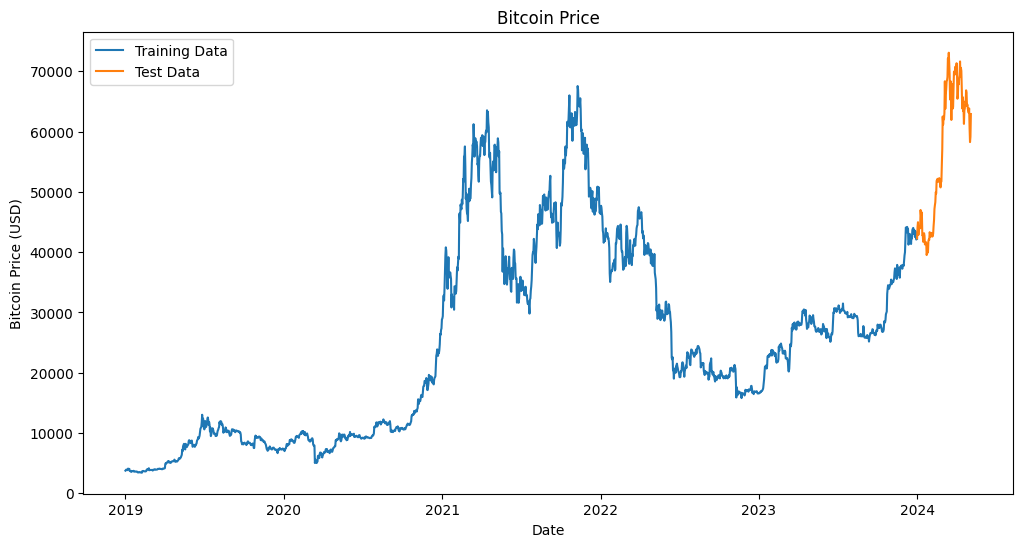

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(btc_train.index, btc_train["Open"], label="Training Data")
plt.plot(btc_test.index, btc_test["Open"], label="Test Data")

plt.xlabel("Date")
plt.ylabel("Bitcoin Price (USD)")
plt.title("Bitcoin Price")
plt.legend()
plt.show()

## d. Normalizing the price data

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(btc_train["Open"].values.reshape(-1, 1))
train_scaled = pd.DataFrame(train_scaled, index=btc_train.index, columns=["Scaled"])

test_scaled = scaler.transform(btc_test["Open"].values.reshape(-1, 1))
test_scaled = pd.DataFrame(test_scaled, index=btc_test.index, columns=["Scaled"])

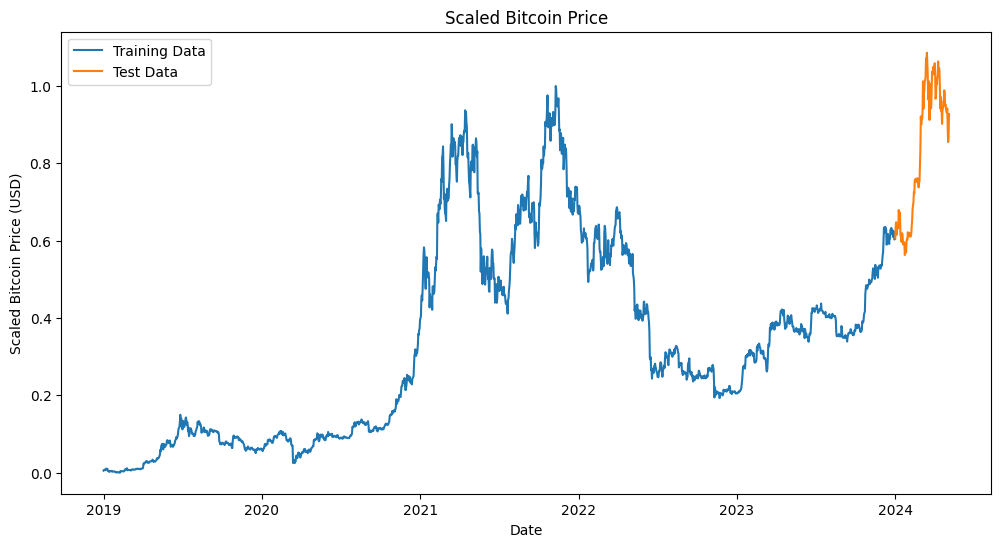

In [7]:
plt.figure(figsize=(12, 6))

plt.plot(btc_train.index, train_scaled["Scaled"], label="Training Data")
plt.plot(btc_test.index, test_scaled["Scaled"], label="Test Data")

plt.xlabel("Date")
plt.ylabel("Scaled Bitcoin Price (USD)")
plt.title("Scaled Bitcoin Price")
plt.legend()
plt.show()

## e. Preparing data for training and testing

In [8]:
import numpy as np

window_size = 60

X_train = []
y_train = []
for i in range(window_size, len(train_scaled)):
    X_train.append(train_scaled.values[i - window_size:i, 0])
    y_train.append(train_scaled.values[i, 0])

X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.array(y_train)

In [9]:
X_train.shape

(1766, 60, 1)

In [10]:
y_train.shape

(1766,)

The shapes of the training data are as expected:
- X_train.shape: (1766, 60, 1)
- y_train.shape: (1766,)

In [11]:
X_test = []
y_test = []
for i in range(window_size, len(test_scaled)):
    X_test.append(test_scaled.values[i - window_size:i, 0])
    y_test.append(test_scaled.values[i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.array(y_test)

In [12]:
X_test.shape

(65, 60, 1)

In [13]:
y_test.shape

(65,)

## f. Creating the LSTM model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # (60, 1)
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50)) # return_sequences=True just last hidden state

model.add(Dense(units=1))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

## g. Training the model

In [16]:
model.compile(optimizer="adam", loss="mean_squared_error")
# model.fit(X_train, y_train, epochs=100, batch_size=32)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
56/56 [==============================] - 17s 39ms/step - loss: 0.0168 - val_loss: 0.0306
Epoch 2/100
56/56 [==============================] - 1s 15ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 3/100
56/56 [==============================] - 1s 15ms/step - loss: 0.0032 - val_loss: 0.0138
Epoch 4/100
56/56 [==============================] - 1s 14ms/step - loss: 0.0036 - val_loss: 0.0141
Epoch 5/100
56/56 [==============================] - 1s 15ms/step - loss: 0.0029 - val_loss: 0.0158
Epoch 6/100
56/56 [==============================] - 1s 15ms/step - loss: 0.0028 - val_loss: 0.0119
Epoch 7/100
56/56 [==============================] - 1s 14ms/step - loss: 0.0026 - val_loss: 0.0125
Epoch 8/100
56/56 [==============================] - 1s 20ms/step - loss: 0.0025 - val_loss: 0.0080
Epoch 9/100
56/56 [==============================] - 1s 21ms/step - loss: 0.0022 - val_loss: 0.0046
Epoch 10/100
56/56 [==============================] - 1s 15ms/step - loss: 0.0021 - val_loss: 0.003

## h. Making predictions and plotting

3/3 [==============================] - 2s 8ms/step


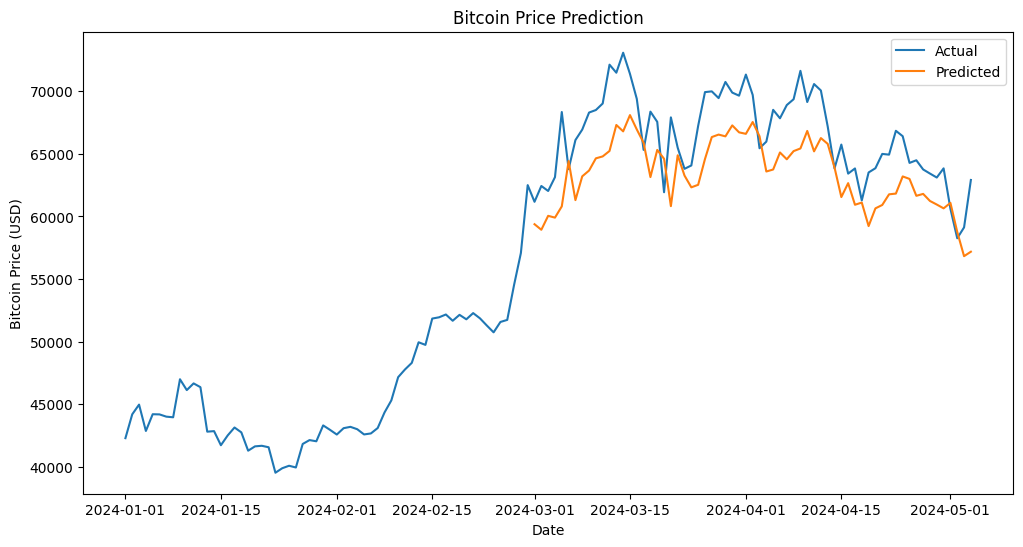

In [17]:
# X_test = []
# for i in range(window_size, len(test_scaled)):
#     X_test.append(test_scaled.values[i - window_size:i, 0])

# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

plt.figure(figsize=(12, 6))
plt.plot(btc_test.index, btc_test["Open"], label="Actual")
# plt.plot(btc_test.index, predictions, label="Predicted")
plt.plot(btc_test.index[window_size:], predictions, label="Predicted")

plt.xlabel("Date")
plt.ylabel("Bitcoin Price (USD)")
plt.title("Bitcoin Price Prediction")
plt.legend()
plt.show()

## i. Advantages and disadvantages of increasing or decreasing the window_size variable

Increasing the window_size (number of past data points used for prediction):
- Advantage: The model can capture longer-term dependencies and patterns in the data, which can improve prediction accuracy, especially for complex time series with long-range correlations.
- Disadvantage: Larger window sizes require more training data and can increase the computational complexity of the model, potentially leading to longer training times and higher memory requirements.

Decreasing the window_size:
- Advantage: The model becomes simpler and faster to train, with lower computational requirements.
- Disadvantage: The model may struggle to capture long-term dependencies and patterns in the data, potentially leading to less accurate predictions, especially for complex time series with long-range correlations.

In general, there is a trade-off between the window_size and the model's ability to capture complex patterns versus its computational complexity and data requirements. The optimal window_size depends on the specific characteristics of the time series data, the available computational resources, and the desired balance between prediction accuracy and model complexity.
